https://www.kaggle.com/competitions/customer-segmentation-clustering/overview

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.stats import fisher_exact

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Удаление пропусков

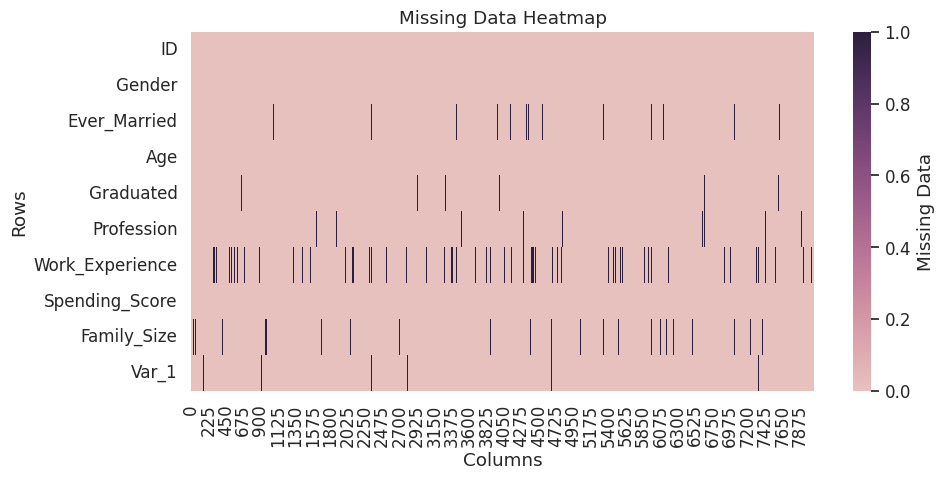

In [ ]:
# Создание экземпляра фигуры и осей для лучшего контроля и получения возможности изменять определенные свойства графика
fig, ax = plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, light=.8)

# Создание тепловой карты
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Missing Data'}, ax=ax)

# Настройка осей
ax.set_title('Missing Data Heatmap')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

# Автоматически настраивайте макет подзаголовка для лучшей видимости
plt.tight_layout()

plt.show()

In [ ]:
df_nan = df.loc[:, df.isnull().any()]
df_nan.isnull().sum() / len(df_nan) * 100 # Процент пропущенных значений

Ever_Married        1.735250
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Family_Size         4.152206
Var_1               0.941993
dtype: float64

Заменяем пропущенные значчения на наиболее часто встречающиеся значения для каждого столбца.

In [ ]:
# Заполнение пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


# Работа с категориальными признаками

In [ ]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [ ]:
df['Ever_Married'].value_counts()

Yes    4783
No     3285
Name: Ever_Married, dtype: int64

In [ ]:
df['Graduated'].value_counts()

Yes    5046
No     3022
Name: Graduated, dtype: int64

In [ ]:
df['Profession'].value_counts()

Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [ ]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [ ]:
df['Var_1'].value_counts()

Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

Заменяем категориальные значения в указанных столбцах `df` на числовые значения с использованием LabelEncoder.


LabelEncoder - это класс из библиотеки sklearn.preprocessing в библиотеке scikit-learn, который используется для преобразования категориальных значений в числовые значения. Он присваивает каждой уникальной категории уникальное числовое значение.

In [ ]:
# Замена категориальных значений
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Var_1', 'Profession']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Установка типов данных
numeric_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1.0,2,4.0,3
1,462643,0,1,38,1,2,1.0,0,3.0,3
2,466315,0,1,67,1,2,1.0,2,1.0,5
3,461735,1,1,67,1,7,0.0,1,2.0,5
4,462669,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0,0.0,2,7.0,0
8064,464685,1,0,35,0,4,3.0,2,4.0,3
8065,465406,0,0,33,1,5,1.0,2,1.0,5
8066,467299,0,0,27,1,5,1.0,2,4.0,5


<ipython-input-172-256e453484c3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


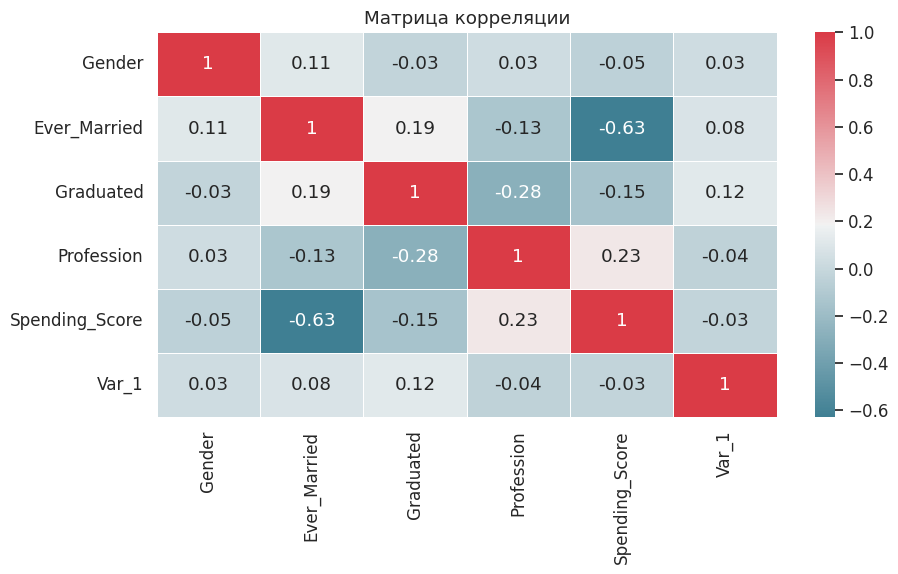

In [ ]:
plt.figure(figsize = (10,5))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

custom_cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap=custom_cmap)

plt.title('Матрица корреляции')
plt.show()

In [ ]:
categories = df.columns.tolist()
categories = categories[1:]
categories

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1']

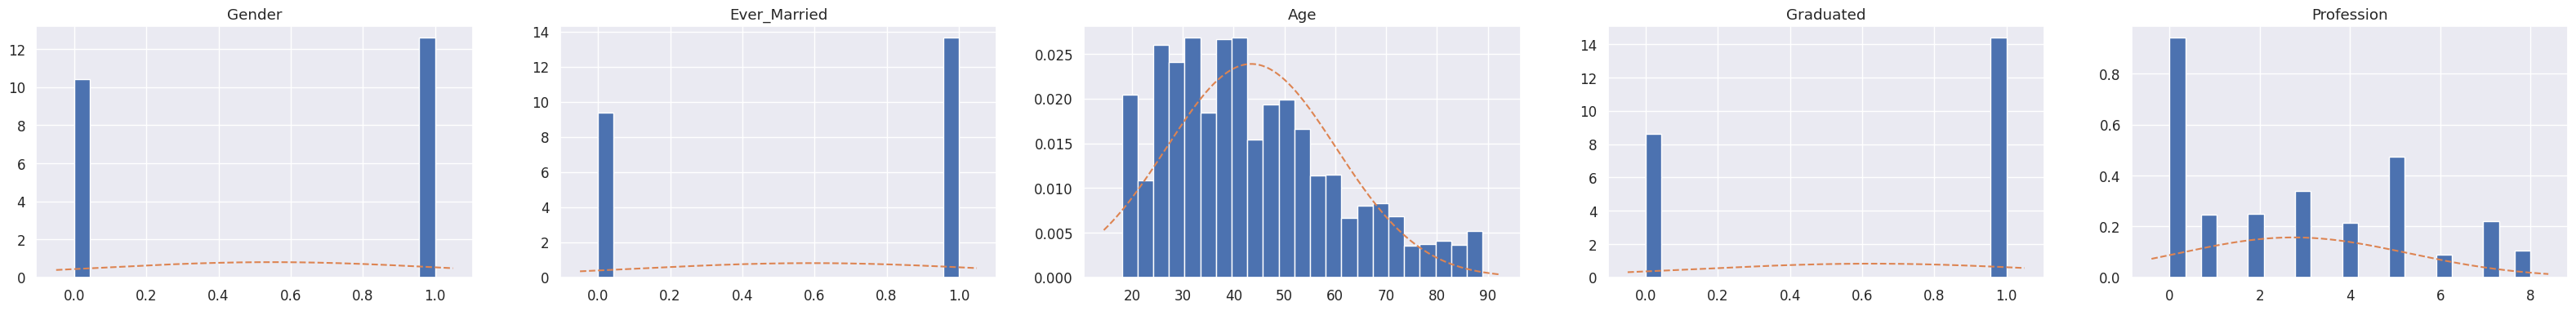

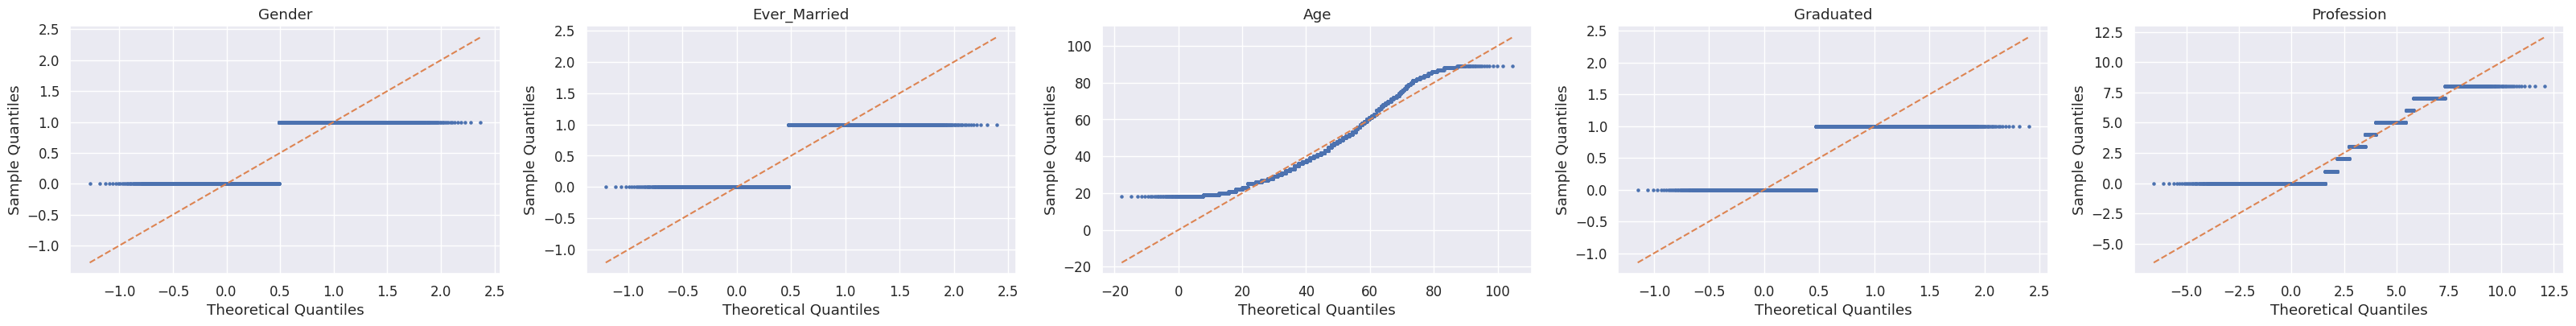

In [ ]:
from scipy import stats

for j in range(5, 10, 5):
    category_range = categories[j-5:j]

    # Histogram and Normal Distribution Plot
    fig, axes = plt.subplots(ncols=len(category_range))
    fig.set_size_inches(8 * len(category_range), 4)
    axes = axes.flatten()

    for i, category in enumerate(category_range):
        ax = axes[i]
        samples = df[category]

        ax.hist(samples, density=True, bins=23)

        loc = samples.mean()
        scale = samples.std()

        x_left, x_right = ax.get_xlim()
        x = np.linspace(x_left, x_right, 10000)
        y = stats.norm.pdf(x, loc=loc, scale=scale)

        ax.plot(x, y, linestyle='dashed')
        ax.set_title(category)

    # Quantile-Quantile Plot
    fig, axes = plt.subplots(ncols=len(category_range))
    fig.set_size_inches(8 * len(category_range), 4)
    axes = axes.flatten()

    for i, category in enumerate(category_range):
        ax = axes[i]
        samples = df[category]

        loc = samples.mean()
        scale = samples.std()

        interval = np.linspace(0, 1, samples.shape[0])[1:-1]
        x = stats.norm.ppf(interval, loc=loc, scale=scale)
        y = np.quantile(samples, interval)

        ax.scatter(x, y, s=5)
        ax.plot(x, x, color='C1', linestyle='dashed')

        ax.set_title(category)
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')


In [ ]:
# Выбор признаков для кластеризации
features = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']
X = df[features]

Выполняем кластеризацию данных с использованием алгоритма KMeans для разного количества кластеров. Он вычисляет значение инерции, которое является мерой того, насколько данные хорошо разделены на кластеры. Чем меньше значение инерции, тем лучше.

Код проходит через цикл для каждого числа кластеров от 1 до 10. Для каждого числа кластеров выполняется следующее:

1. Создается объект KMeans с указанным числом кластеров.
2. Алгоритм KMeans применяется к данным, чтобы выполнить кластеризацию и разделить данные на указанное количество кластеров.
3. Вычисляется значение инерции для полученных кластеров.
4. Значение инерции добавляется в список.

Инерция в контексте алгоритма KMeans можно представить как меру, насколько точки внутри каждого кластера близки друг к другу. Чем меньше значение инерции, тем более компактные и плотные кластеры.

Представьте, что данные представлены точками на плоскости, и каждая точка относится к определенному кластеру. Инерция измеряет, насколько близки точки внутри каждого кластера друг к другу и насколько далеки они от точек в других кластерах.

In [ ]:
# Вычисление значения инерции для различных чисел кластеров
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Определение оптимального числа кластеров с помощью метода локтя

Определение оптимального числа кластеров на основе графика метода локтя является субъективным и зависит от данных и задачи. Однако, общая идея заключается в поиске точки на графике, где изменение инерции (суммы квадратов расстояний) замедляется значительно. Эта точка на графике напоминает изгиб локтя.

Определение оптимального числа кластеров можно выполнить следующим образом:

1. Постройте график метода локтя, где на оси x отображается количество кластеров, а на оси y - соответствующая инерция.
2. Оцените график и найдите точку на графике, где изменение инерции замедляется значительно. Это может выглядеть как изгиб или локоть.
3. Выберите это значение как оптимальное число кластеров.

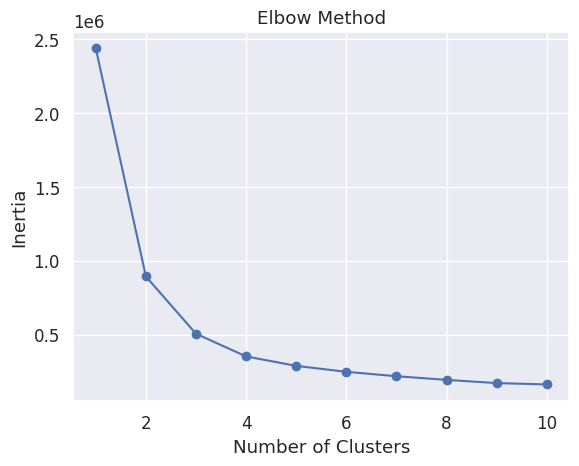

In [ ]:
# Построение графика метода локтя
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Создание модели кластеризации с оптимальным числом кластеров
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

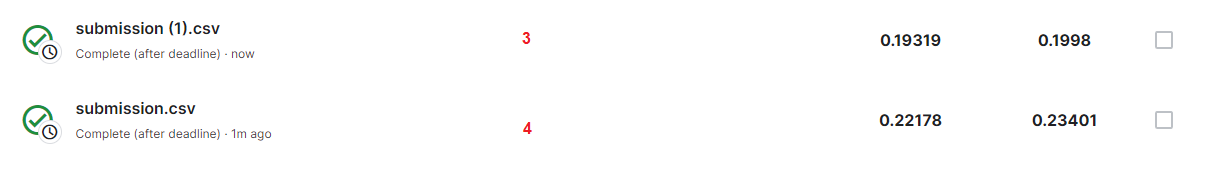

In [ ]:
# Кластеризация данных
kmeans.fit(X)

# Получение меток кластеров
labels = kmeans.labels_

# Создание DataFrame с ответами
submission = pd.DataFrame({'ID': df['ID'], 'Segmentation': labels + 1})

# Сохранение DataFrame с ответами в файл
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

,ID,Segmentation
0,462809,3
1,462643,1
2,466315,2
3,461735,2
4,462669,1
...,...,...
8063,464018,3
8064,464685,1
8065,465406,3
8066,467299,3


График разделения на кластеры будет показывать каждую точку данных на плоскости с координатами feature1 и feature2. Каждый кластер будет отмечен уникальным цветом (с использованием параметра c) для визуальной идентификации. Это позволяет оценить, насколько хорошо данные разделены на кластеры и как они взаимодействуют в пространстве двух выбранных признаков.

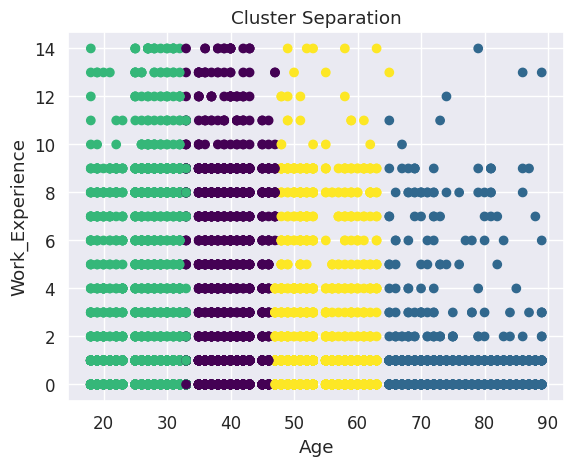

In [ ]:
import matplotlib.pyplot as plt

# Выберите два признака для визуализации
feature1 = 'Age'
feature2 = 'Work_Experience'

# Создайте график разделения на кластеры
plt.scatter(df[feature1], df[feature2], c=labels, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Cluster Separation')
plt.show()